# Forecasting bitcoin price using Aurelien Geron course on Udacity

In [ ]:
# Download Bitcoin historical data from GitHub 
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18

In [2]:
import pandas as pd 
import numpy as np

/tmp/ipykernel_247948/4018586642.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
# Load dataset
prices_raw_df = pd.read_csv('/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv')
prices_raw_df.head()

Currency        Date  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
0      BTC  2013-10-01            123.65499       124.30466       124.75166   
1      BTC  2013-10-02            125.45500       123.65499       125.75850   
2      BTC  2013-10-03            108.58483       125.45500       125.66566   
3      BTC  2013-10-04            118.67466       108.58483       118.67500   
4      BTC  2013-10-05            121.33866       118.67466       121.93633   

   24h Low (USD)  
0      122.56349  
1      123.63383  
2       83.32833  
3      107.05816  
4      118.00566

Let's use only `Date` and `Closing Price (USD)` to run our forecasting algorithm

In [8]:
prices = pd.DataFrame({"date":prices_raw_df['Date'],
                       "price":prices_raw_df['Closing Price (USD)']})
prices.head()

date      price
0  2013-10-01  123.65499
1  2013-10-02  125.45500
2  2013-10-03  108.58483
3  2013-10-04  118.67466
4  2013-10-05  121.33866

<Axes: >

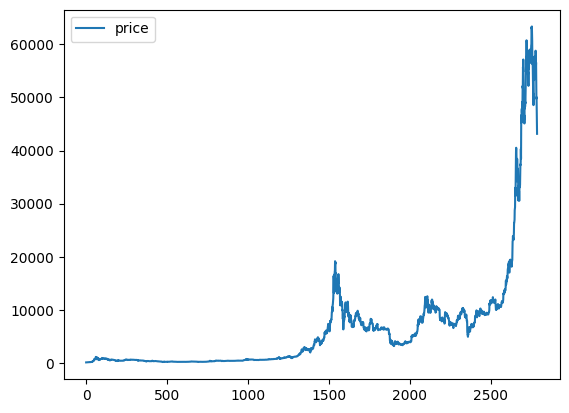

In [9]:
prices.plot()

In [39]:
split_time = 2000
x_train = list(prices['date'][:split_time])
y_train = list(prices['price'][:split_time])

x_test = list(prices['date'][split_time:])
y_test = list(prices['price'][split_time:])

len(x_train), len(y_train), len(x_test), len(y_test)

(2000, 2000, 787, 787)

Convert the list to np.array and set proper dtype to be plot properly

In [40]:
x_train = np.asarray(x_train, dtype='datetime64[ns]')
y_train = np.asarray(y_train)
x_test = np.asarray(x_test, dtype='datetime64[ns]')
y_test = np.asarray(y_test)


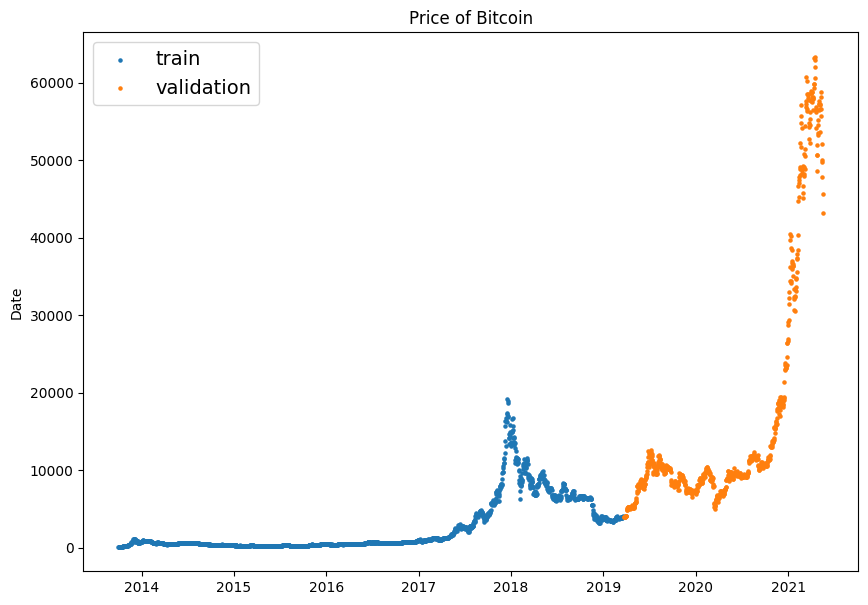

In [41]:
# Plot train and test sample
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, s=5, label='train')
plt.scatter(x_test, y_test, s=5, label='validation')
plt.ylabel("BTC Price")
plt.ylabel("Date")
plt.title("Price of Bitcoin")
plt.legend(fontsize=14)

## Naive forecast

In [42]:
naive_forecast = list(prices['price'][split_time-1 : -1])

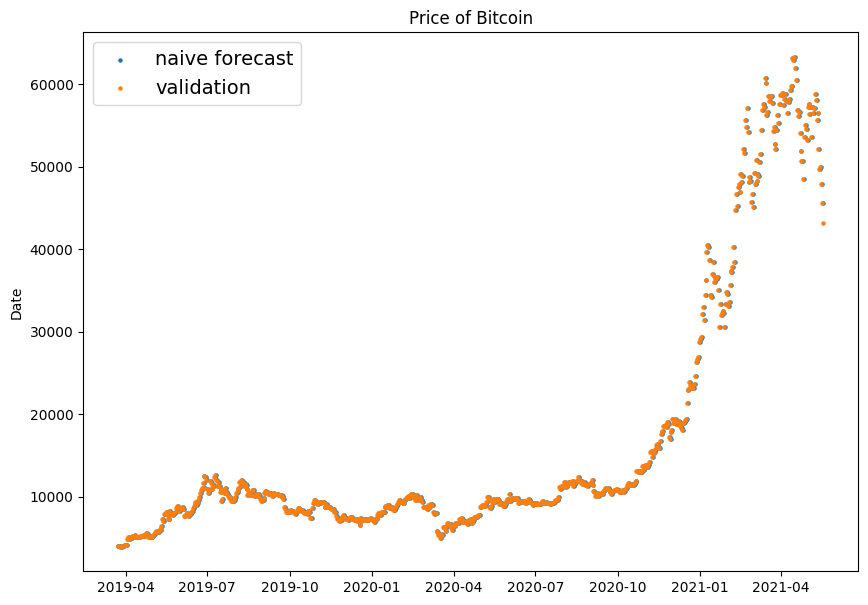

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(x_test, naive_forecast, s=5, label='naive forecast')
plt.scatter(x_test, y_test, s=5, label='validation')
plt.ylabel("BTC Price")
plt.ylabel("Date")
plt.title("Price of Bitcoin")
plt.legend(fontsize=14)

In [45]:
type(x_test), type(naive_forecast)

(numpy.ndarray, list)

In [47]:
import tensorflow as tf
mae = tf.keras.metrics.mean_absolute_error(y_test, naive_forecast).numpy()
print(mae)

475.20264


## Moving average

In [48]:
# Defining function to create average windows over series
def moving_average_forecast(series, window_size):
    forecast = []
    for time in range(len(series)-window_size):
        forecast.append(series[time:time+window_size].mean())
    
    return np.array(forecast)

In [53]:
# A faster version
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast
     This implementation is *much* faster than the previous one"""
  mov = np.cumsum(series)
  mov[window_size:] = mov[window_size:] - mov[:-window_size]
  return mov[window_size - 1:-1] / window_size

In [51]:
WINDOW_SIZE = 7
moving_average_forecast_input = list(prices['price'][split_time - WINDOW_SIZE :])
moving_avg = moving_average_forecast(np.asarray(moving_average_forecast_input), WINDOW_SIZE)
len(moving_avg)

787

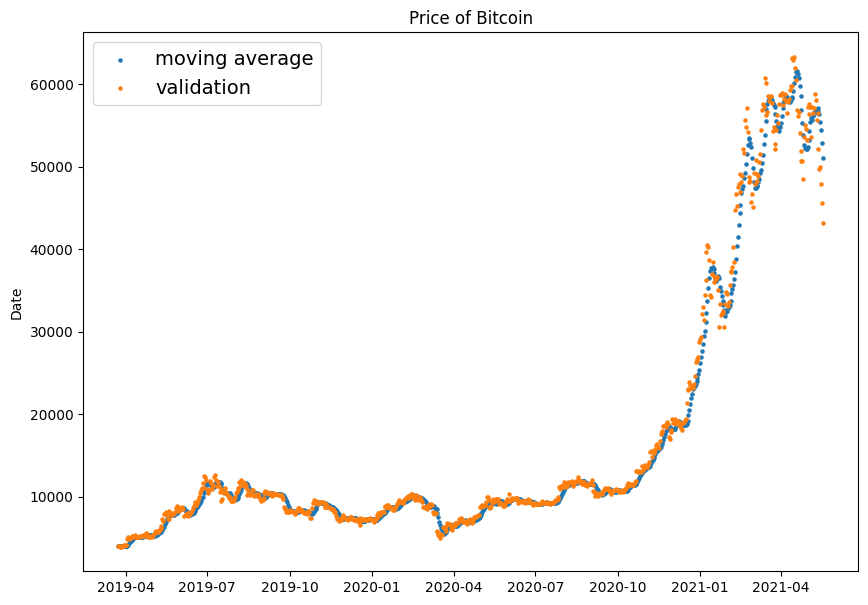

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(x_test, moving_avg, s=5, label='moving average')
plt.scatter(x_test, y_test, s=5, label='validation')
plt.ylabel("BTC Price")
plt.ylabel("Date")
plt.title("Price of Bitcoin")
plt.legend(fontsize=14)

In [54]:
import tensorflow as tf
mae = tf.keras.metrics.mean_absolute_error(y_test, moving_avg).numpy()
print(mae)

891.5760815602389
